# Import del dataset

In [1]:
#Path file
percorso = '/content/drive/MyDrive/hateful_memes.zip'

In [7]:
#Unzip the file
import zipfile
with zipfile.ZipFile(percorso, 'r') as zip_ref:
    zip_ref.extractall('.')

In [3]:
#import json files
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train = pd.read_json('/content/hateful_memes/train.jsonl',lines=True)
val = pd.read_json('/content/hateful_memes/dev_seen.jsonl',lines=True)
test = pd.read_json('/content/hateful_memes/test_seen.jsonl',lines=True)

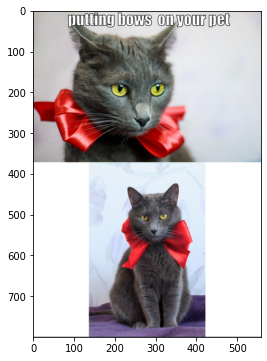

In [4]:
#Visualize dataset
path_base = '/content/hateful_memes'
plt.figure(figsize=(10,6))
img = plt.imread(path_base + '/' +train['img'][2])
plt.imshow(img)

In [36]:
#Funzione per visualizzare le immagini dato il path
def VisualizeImage(path):
  path_base = '/content/hateful_memes'
  plt.figure(figsize=(10,6))
  img = plt.imread(path_base + '/' +path)
  plt.imshow(img)

# Name Entity Recognition

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [48]:
def NameEntityRec(text):
  doc = nlp(text)
  words = []

  for token in doc:
    if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
      words.append(token.text)  
  return words  

In [47]:
#Prova per vedere cosa stampa
text = train['text'][4]
doc = nlp(text)
print(text)

words = []

for token in doc:
  #print(token, token.pos_)
  if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
    words.append(token.text)

everybody loves chocolate chip cookies, even hitler


In [69]:
#Concateno le parole
string=""
for elem in words:
  string += ' ' + elem 

# Object Detection

In [10]:
#Installo dipendenze per Object Detection
!pip install tensorflow==2.4.0
!pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0
!pip install imageai --upgrade

     |████████████████████████████████| 394.7 MB 17 kB/s 
     |████████████████████████████████| 3.8 MB 15.4 MB/s 
     |████████████████████████████████| 2.9 MB 48.1 MB/s 
     |████████████████████████████████| 462 kB 59.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=830f6b98fdb3c6bfaae4d42387f4d79a145c198686d82aa142796dcad3a2fd3a
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.43.0
    Uninstalling grpcio-1.43.0:
      Successfully uninstalled grpcio-1.43.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

     |████████████████████████████████| 14.9 MB 21.2 MB/s 
     |████████████████████████████████| 2.1 MB 55.6 MB/s 
     |████████████████████████████████| 11.6 MB 43.5 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=5e82a6b10fc4ac9445994479faa20110f06493854609343545c8acbf4af0bf4b
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: matplotlib
    Found existing installation: 

     |████████████████████████████████| 160 kB 17.6 MB/s 


In [31]:
#Definisco qui il modello di Object Detection
from imageai.Detection import ObjectDetection
import os

#path_drive_COCO = "/content/drive/MyDrive/resnet50_coco_best_v2.1.0.h5"
#path_drive_YOLO_tiny = "/content/drive/MyDrive/yolo-tiny.h5"
path_drive_YOLO = "/content/drive/MyDrive/yolo.h5"

#execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3() #Risulta essere veloce e mediamente accurato
#detector.setModelTypeAsRetinaNet()
#detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath(path_drive_YOLO)
detector.loadModel()


In [14]:
#Prova per vedere i risultati di probabilità
path_img = path_base + '/' +train['img'][50]
print(path_img)
tags = []
detections = detector.detectObjectsFromImage(input_image=path_img, output_image_path="/content/output/imgnew1.jpg")

for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
    tags.append(eachObject["name"])

/content/hateful_memes/img/10263.png
person  :  64.95517492294312


In [32]:
#Definisco la funzione di Object Recognition
def ObjectRecognizer(path_img):
  
  detections = detector.detectObjectsFromImage(input_image=path_img, output_image_path="/content/output/imgnew1.jpg")
  tags = []

  for eachObject in detections:
    tags.append(eachObject["name"])

  return tags #Ritorno i tags con gli elementi trovati

# Generazione Dataframe

In [49]:
path_of_images = path_base+"/img"
rows = []

#Versione tagliata del train per motivi di tempo
train_cut = train.head(5)

for i in range(len(train_cut)):
  print("Elementi rimanenti: ", (len(train_cut)-i))
  #Creo i tags visivi
  tags = ObjectRecognizer(path_base+'/'+train_cut['img'][i])
  #Cerco i tags nella frase
  ner = NameEntityRec(train_cut['text'][i])

  #Creo la matrice
  rows.append([train_cut['img'][i], tags, ner, train_cut['text'][i]])

#Genero dalla matrice il DataFrame
informazioni_ricevute = pd.DataFrame(rows,columns=['img', 'tags', 'ner', 'testo'])

Elementi rimanenti:  5
/content/hateful_memes/img/42953.png
Elementi rimanenti:  4
/content/hateful_memes/img/23058.png
Elementi rimanenti:  3
/content/hateful_memes/img/13894.png
Elementi rimanenti:  2
/content/hateful_memes/img/37408.png
Elementi rimanenti:  1
/content/hateful_memes/img/82403.png


In [54]:
#Visualizzo i risultati del dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(informazioni_ricevute.head(5))

             img                   tags                                 ner  \
0  img/42953.png       [person, person]                  [character, color]   
1  img/23058.png  [person, person, tie]                                [ex]   
2  img/13894.png             [cat, cat]                         [bows, pet]   
3  img/37408.png             [dog, dog]              [squirrels, squirrels]   
4  img/82403.png          [person, tie]  [chocolate, chip, cookies, hitler]   

                                               testo  
0   its their character not their color that matters  
1  don't be afraid to love again everyone is not ...  
2                           putting bows on your pet  
3  i love everything and everybody! except for sq...  
4  everybody loves chocolate chip cookies, even h...  


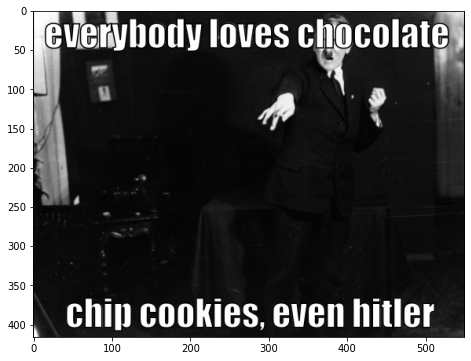

In [39]:
#Visualizzo il meme
VisualizeImage('img/82403.png')

# Detecting Passive-Aggressive in text (PROVA)

In [21]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
metadata_pd = pd.concat([train, val])
metadata_pd = pd.concat([metadata_pd, test])

In [47]:
labels=metadata_pd.label
x_train,x_test,y_train,y_test=train_test_split(metadata_pd['text'], labels, test_size=0.2, random_state=7)

In [48]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [51]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 59.5%


In [52]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[829, 395],
       [415, 361]])

# Image Captioning (OSCAR?)

In [1]:
!git clone https://github.com/microsoft/Oscar.git

Cloning into 'Oscar'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 131 (delta 44), reused 34 (delta 34), pack-reused 58
Receiving objects: 100% (131/131), 726.16 KiB | 8.07 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
%cd Oscar

/content/Oscar


In [3]:
!python setup.py build develop

running install
running bdist_egg
running egg_info
creating oscar.egg-info
writing oscar.egg-info/PKG-INFO
writing dependency_links to oscar.egg-info/dependency_links.txt
writing top-level names to oscar.egg-info/top_level.txt
writing manifest file 'oscar.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'oscar.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/oscar
copying oscar/run_oscarplus_pretrain.py -> build/lib/oscar
copying oscar/run_nlvr.py -> build/lib/oscar
copying oscar/run_captioning.py -> build/lib/oscar
copying oscar/run_vqa.py -> build/lib/oscar
copying oscar/__init__.py -> build/lib/oscar
copying oscar/run_retrieval.py -> build/lib/oscar
copying oscar/run_gqa.py -> build/lib/oscar
creating build/lib/oscar/utils
copying oscar/utils/cbs.py -> build/lib/oscar/utils
copying oscar/utils/tsv_file.py -> build/lib/oscar/utils
copying osc

In [4]:
%cd ..

/content


In [5]:
%rm -rf Oscar